In [1]:
import numpy as np
>>> from scipy import signal
>>> import matplotlib.pyplot as plt

In [2]:
>>> fs = 1024
>>> N = 10*fs
>>> nperseg = 512
>>> amp = 2 * np.sqrt(2)
>>> noise_power = 0.001 * fs / 2
>>> time = np.arange(N) / float(fs)
>>> carrier = amp * np.sin(2*np.pi*50*time)
>>> noise = np.random.normal(scale=np.sqrt(noise_power),
...                          size=time.shape)
>>> x = carrier + noise


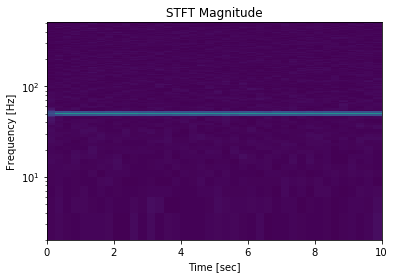

In [3]:
>>> f, t, Zxx = signal.stft(x, fs=fs, nperseg=nperseg)
>>> plt.figure()
>>> plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
>>> plt.ylim([f[1], f[-1]])
>>> plt.title('STFT Magnitude')
>>> plt.ylabel('Frequency [Hz]')
>>> plt.xlabel('Time [sec]')
>>> plt.yscale('log')
>>> plt.show()

In [4]:
>>> Zxx = np.where(np.abs(Zxx) >= amp/10, Zxx, 0)
>>> _, xrec = signal.istft(Zxx, fs)

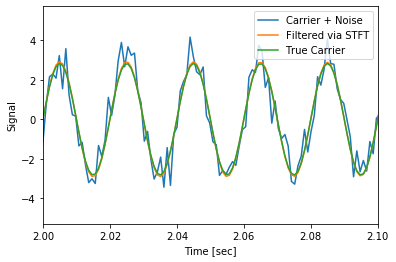

In [5]:
>>> plt.figure()
>>> plt.plot(time, x, time, xrec, time, carrier)
>>> plt.xlim([2, 2.1])
>>> plt.xlabel('Time [sec]')
>>> plt.ylabel('Signal')
>>> plt.legend(['Carrier + Noise', 'Filtered via STFT', 'True Carrier'])
>>> plt.show()